# <center> Exploratory Data Analysis on Haberman Survival Data Set</center>
___

###  <b>Exercise</b> :

1.	Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2.	Perform a similar alanlaysis as above on this dataset with the following sections:
3.	High level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.
4.	Explain our objective.
5.	Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
6.	Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
7.	Write your observations in english as crisply and unambigously as possible. Always quantify your results.


### Information regarding data set :

1. <b>Title</b>: Haberman's Survival Data

2. <b>Sources</b>: (a) Donor: Tjen-Sien Lim (limt@stat.wisc.edu) (b) Date: March 4, 1999

3. <b>Relevant Information</b>: The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

4. <b>Past Usage</b>:
    * Haberman, S. J. (1976). Generalized Residuals for Log-Linear Models, Proceedings of the 9th International Biometrics      Conference, Boston, pp. 104-122. 
    * Landwehr, J. M., Pregibon, D., and Shoemaker, A. C. (1984), Graphical Models for Assessing Logistic Regression Models (with discussion), Journal of the American Statistical Association 79: 61-83. 
    * Lo, W.-D. (1993). Logistic Regression Trees, PhD thesis, Department of Statistics, University of Wisconsin, Madison, WI.  



---

### <b>Objective :</b> 
> <span style="color:blue">It is a classification problem, where we have to analyze and provide observation 
which evaluates whether a patient would survive a cancer treatment or not.<span>

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load heberman.csv in panda's daraframe.
haberman = pd.read_csv("haberman.csv")
haberman

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


#### (Q) how many data-points and features?

In [3]:
print("Number of data-points present in dataset is {0}".format(haberman.shape[0]))
print("Number of features/classes present in dataset is {0}".format(haberman.shape[1]))

Number of data-points present in dataset is 305
Number of features/classes present in dataset is 4


#### (Q) What are the column/attribute names and their information in our dataset?

In [4]:
for column in haberman:
    if haberman.columns.get_loc(column) == 0:
        print("Column name is {0} : It represent age of patient at time of operation (numerical)\n".format(column))
    elif haberman.columns.get_loc(column) == 1:
        print("Column name is {0} : Patient's year of operation (year - 1900, numerical)\n".format(column))
    elif haberman.columns.get_loc(column) == 2:
        print("Column name is {0} : Number of positive axillary nodes detected (numerical)\n".format(column))
    elif haberman.columns.get_loc(column) == 3:
        print("Column name is {0} : Survival status (class attribute)".format(column))
        print("\t\t\t -- 1 = the patient survived 5 years or longer")
        print("\t\t\t -- 2 = the patient died within 5 year")
        
        

Column name is 30 : It represent age of patient at time of operation (numerical)

Column name is 64 : Patient's year of operation (year - 1900, numerical)

Column name is 1 : Number of positive axillary nodes detected (numerical)

Column name is 1.1 : Survival status (class attribute)
			 -- 1 = the patient survived 5 years or longer
			 -- 2 = the patient died within 5 year


In [5]:
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [6]:
# Rename columns for better understanding also modify data for "survival_status" column.
# 1 --> Yes if the patient survived 5 years or longer
# 2 --> No the patient died within 5 year

haberman.columns = ['Patient_age', 'Year_of_operation','Axillary_nodes','Survival_status']
haberman['Survival_status'] = haberman['Survival_status'].apply(lambda x: "Yes" if x == 1 else "No")
haberman

,Patient_age,Year_of_operation,Axillary_nodes,Survival_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes
5,33,60,0,Yes
6,34,59,0,No
7,34,66,9,No
8,34,58,30,Yes
9,34,60,1,Yes


#### (Q) How many data points for each class are present? 

In [7]:
# From above table we can easily find that we have to classify data on the basis of "Survival_status"
# Yes = the patient survived 5 years or longer
# No = the patient died within 5 year.
# It is an imbalanced datasets as number of value counts are far away from each other.

haberman['Survival_status'].value_counts()

Yes    224
No      81
Name: Survival_status, dtype: int64

In [8]:
# Similarly, another finding can be done on the basis of "Year_of_operation"
# It is a partially balanced datasets as number of value counts are not far away from each other.

haberman['Year_of_operation'].value_counts()

58    36
64    30
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year_of_operation, dtype: int64

#### <b>Note :</b> 
<span style="color: #FF5722">Even though the dataset is not balanced in the case of survival status, still we can perform univariate and bivariate analysis on the feature.<span>    

### (1) Univariate Analysis : 
---

#### (1.1) 1D Scatter Plot : 
By our understanding we know that,  
A more number of positive axillary lymph node are bad for the patient survival.


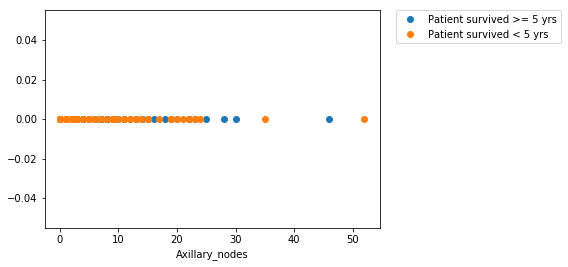

In [9]:
haberman_yes = haberman.loc[haberman["Survival_status"] == "Yes"]
haberman_no = haberman.loc[haberman["Survival_status"] == "No"]
plt.plot(haberman_yes["Axillary_nodes"], \
         np.zeros_like(haberman_yes['Axillary_nodes']), 'o', \
         label="Patient survived >= 5 yrs")

plt.plot(haberman_no["Axillary_nodes"], \
         np.zeros_like(haberman_no['Axillary_nodes']), \
         'o', label="Patient survived < 5 yrs")

plt.xlabel('Axillary_nodes')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### (1.2) Histograms and Probability Density Functions (PDF) : 

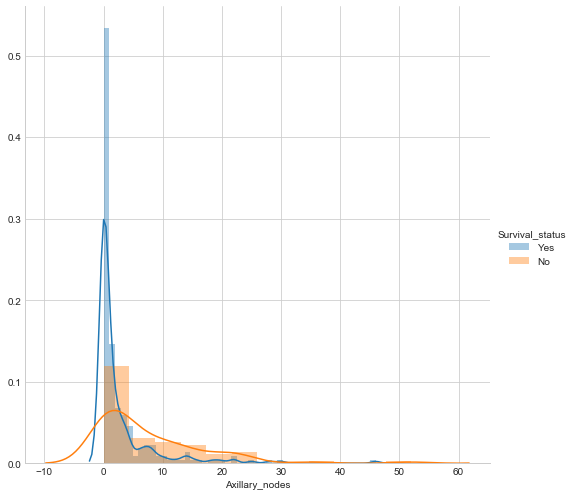

In [10]:
# Histograms and Probability Density Functions (PDF) of Axillary_nodes
sns.set_style("whitegrid");
sns.FacetGrid(haberman,hue="Survival_status",size=7) \
   .map(sns.distplot,"Axillary_nodes") \
   .add_legend()
plt.show();


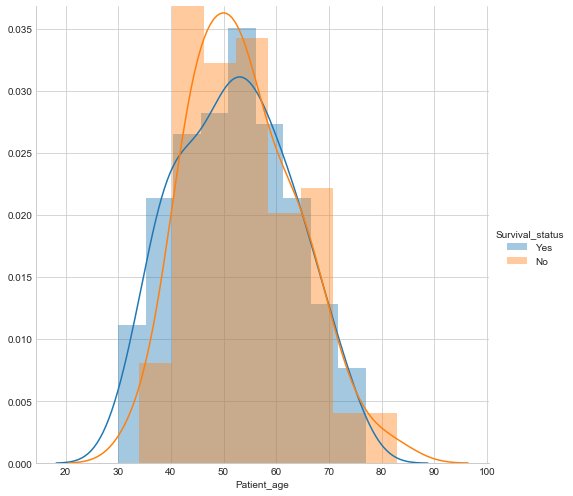

In [11]:
# Histograms and Probability Density Functions (PDF) of Patient_age
sns.FacetGrid(haberman,hue="Survival_status",size= 7) \
   .map(sns.distplot,"Patient_age") \
   .add_legend()
plt.show()

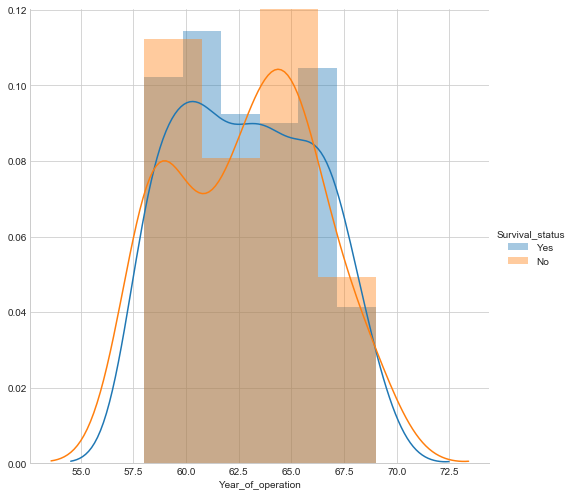

In [12]:
# Histograms and Probability Density Functions (PDF) of Year_of_operation
sns.FacetGrid(haberman,hue="Survival_status",size=7) \
   .map(sns.distplot,"Year_of_operation") \
   .add_legend()
plt.show()

#### (1.3) Cumulative Distribution Functions (CDF) : 


Cumulative Density Functions (CDF) of Axillary_nodes (patients who survived >= 5 yrs) :-  

PDF : 
 [ 0.83482143  0.08035714  0.02232143  0.02678571  0.01785714  0.00446429
  0.00892857  0.          0.          0.00446429]

Bin Edges : 
 [  0.    4.6   9.2  13.8  18.4  23.   27.6  32.2  36.8  41.4  46. ]

-----------------------------------------------------------------------------------------


Cumulative Density Functions (CDF) of Axillary_nodes (patients who survived < 5 yrs) :- 

PDF : 
 [ 0.56790123  0.14814815  0.13580247  0.04938272  0.07407407  0.
  0.01234568  0.          0.          0.01234568]

Bin Edges : 
 [  0.    5.2  10.4  15.6  20.8  26.   31.2  36.4  41.6  46.8  52. ]

-----------------------------------------------------------------------------------------



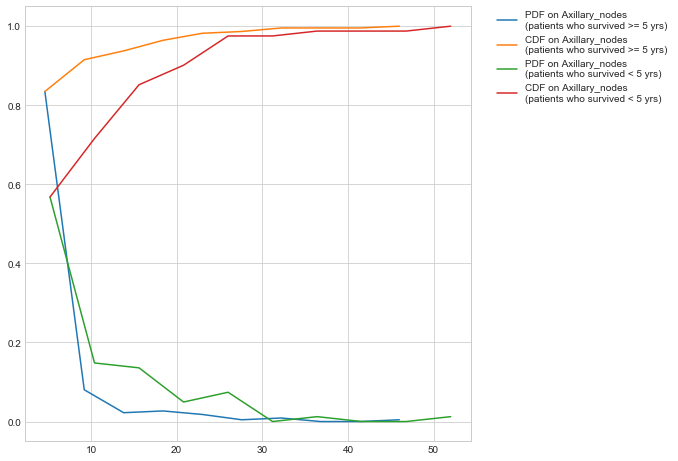


Cumulative Density Functions (CDF) of Patient_age (patients who survived >= 5 yrs) :-  

PDF : 
 [ 0.04910714  0.10714286  0.125       0.09375     0.16517857  0.16517857
  0.09375     0.11160714  0.0625      0.02678571]

Bin Edges : 
 [ 30.   34.7  39.4  44.1  48.8  53.5  58.2  62.9  67.6  72.3  77. ]

-----------------------------------------------------------------------------------------


Cumulative Density Functions (CDF) of Patient_age (patients who survived < 5 yrs) :- 

PDF : 
 [ 0.03703704  0.12345679  0.19753086  0.19753086  0.13580247  0.12345679
  0.09876543  0.04938272  0.02469136  0.01234568]

Bin Edges : 
 [ 34.   38.9  43.8  48.7  53.6  58.5  63.4  68.3  73.2  78.1  83. ]

-----------------------------------------------------------------------------------------



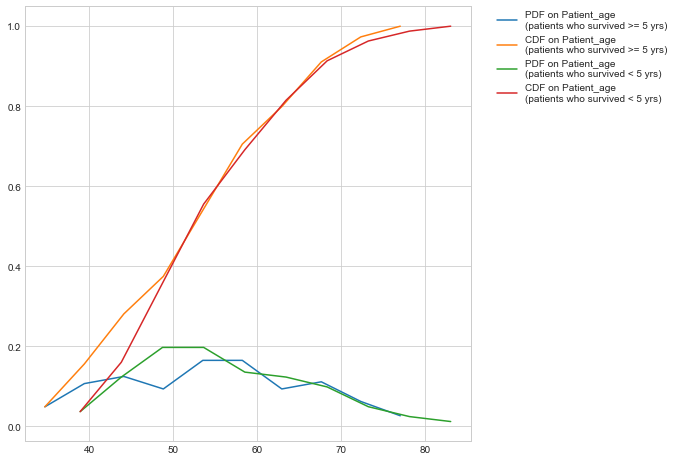


Cumulative Density Functions (CDF) of Year_of_operation (patients who survived >= 5 yrs) :-  

PDF : 
 [ 0.1875      0.10714286  0.10267857  0.07142857  0.09821429  0.09821429
  0.06696429  0.09821429  0.09375     0.07589286]

Bin Edges : 
 [ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]

-----------------------------------------------------------------------------------------


Cumulative Density Functions (CDF) of Year_of_operation (patients who survived < 5 yrs) :- 

PDF : 
 [ 0.25925926  0.04938272  0.03703704  0.08641975  0.09876543  0.09876543
  0.16049383  0.07407407  0.04938272  0.08641975]

Bin Edges : 
 [ 58.   59.1  60.2  61.3  62.4  63.5  64.6  65.7  66.8  67.9  69. ]

-----------------------------------------------------------------------------------------



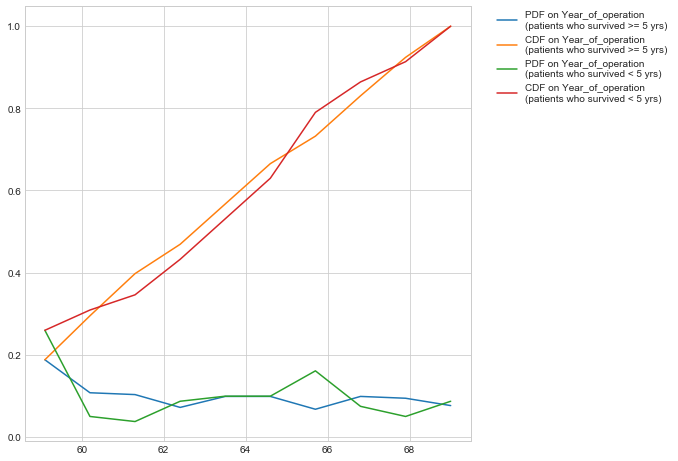

In [13]:
# Cumulative Density Functions (CDF) for patients who survived >= 5 and < 5
def showCDF(feature):
    print("\nCumulative Density Functions (CDF) of "+feature+" (patients who survived >= 5 yrs) :-  \n")
    count,bin_edges = np.histogram(haberman_yes[feature],bins=10,density=True)

    pdf = count/(sum(count))

    print("PDF : \n",pdf)
    print("\nBin Edges : \n",bin_edges)

    cdf = np.cumsum(pdf)
    plt.figure(figsize=(8, 8))
    plt.plot(bin_edges[1:],pdf,label="PDF on "+feature+" \n(patients who survived >= 5 yrs)")
    plt.plot(bin_edges[1:],cdf,label="CDF on "+feature+" \n(patients who survived >= 5 yrs)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    print("\n-----------------------------------------------------------------------------------------\n")

    print("\nCumulative Density Functions (CDF) of "+feature+" (patients who survived < 5 yrs) :- \n")
    count,bin_edges = np.histogram(haberman_no[feature],bins=10,density=True)

    pdf = count/(sum(count))

    print("PDF : \n",pdf)
    print("\nBin Edges : \n",bin_edges)

    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:],pdf,label="PDF on "+feature+"\n(patients who survived < 5 yrs)")
    plt.plot(bin_edges[1:],cdf,label="CDF on "+feature+"\n(patients who survived < 5 yrs)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    print("\n-----------------------------------------------------------------------------------------\n")
    plt.show()
    
    
showCDF("Axillary_nodes")
showCDF("Patient_age")
showCDF("Year_of_operation")

#### (1.4) Box-plot with whiskers

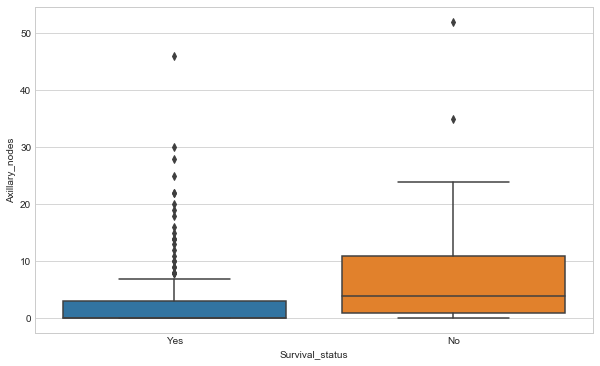

In [14]:
# Box-plot with whiskers is an another method of visualizing the 1-D scatter plot more intuitivey.
plt.figure(figsize=(10, 6))
sns.boxplot(x="Survival_status",y="Axillary_nodes",data=haberman)
plt.show()

#### (1.5) Violin plot

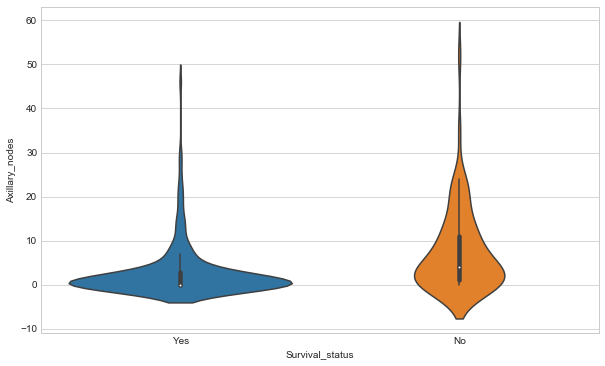

In [15]:
# A violin plot combines the benefits of the both, PDF and BoxPlot, and simplifies them.
plt.figure(figsize=(10, 6))
sns.violinplot(x="Survival_status",y="Axillary_nodes",data=haberman)
plt.show()

### (2) Bivariate Analysis :
---

#### (2.1) Pair Plot

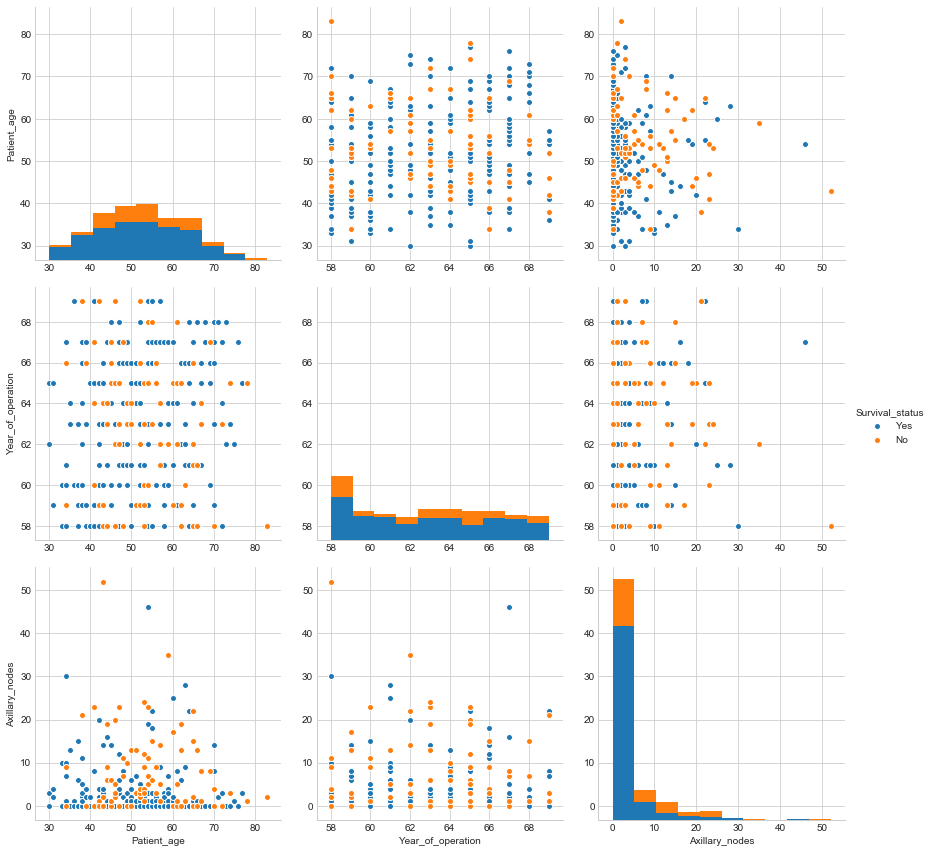

In [16]:
# Pair plots are used when number of features are more than 2, to see different 
# combinations of features with each other.
# NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.
# ,vars=["Patient_age","Year_of_operation","Axillary_nodes"]
plt.close();
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="Survival_status",size=4)
plt.show()

#### (2.2) 2D-Scatter plot

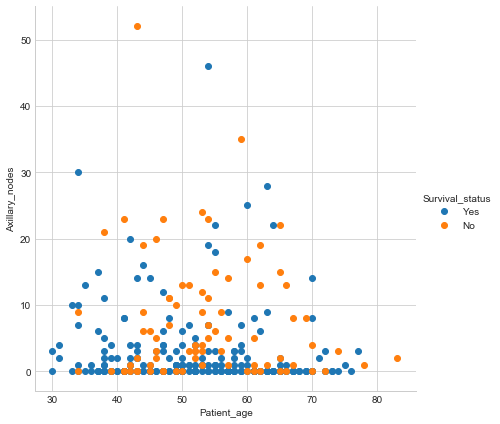

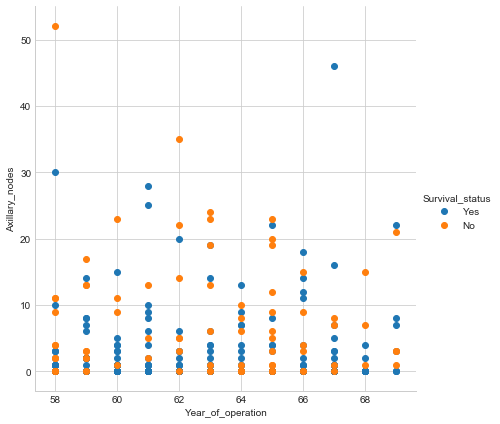

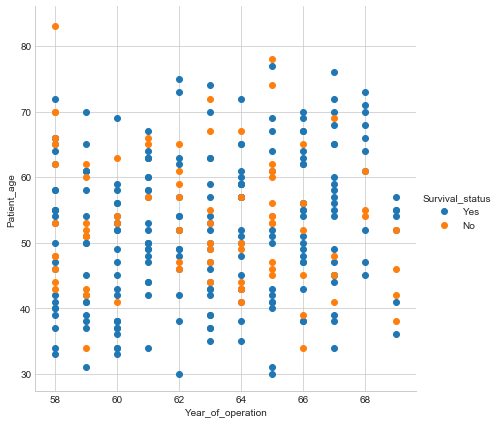

In [17]:
# 2D-Scatter plots is used when number of features is 2.
# Note: From above pair plot figure we can take,
# Axillary_nodes and Patient_age as two features for scatter plot.

sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6) \
   .map(plt.scatter,'Patient_age','Axillary_nodes') \
   .add_legend()
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6) \
   .map(plt.scatter,'Year_of_operation','Axillary_nodes') \
   .add_legend()
plt.show()

sns.set_style("whitegrid")
sns.FacetGrid(haberman,hue="Survival_status",size=6) \
   .map(plt.scatter,'Year_of_operation','Patient_age') \
   .add_legend()
plt.show()



---
### Observations :
---

> 1. From univariate analysis we found that Axillary_nodes is useful feature for furhter analysis.
> 2. From bivariate analysis we found that, in correspondence with Axillary_nodes, we can pair two more features like Patient_age and Year_of_operation.
> 3. All patients who has 0 Axillary_nodes, have greater chance of survival.
> 4. No patient has survived whose Axillary_nodes is greater than 50.
> 5. So whether a patient would survive a cancer treatment or not is dependent on Axillary_nodes.if 0 then he/she has high chance of survival and above 50 has low chance of survival.

---
